<a href="https://colab.research.google.com/github/lawchris96/portfolio/blob/main/NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/lawchris96/datascienceclass/main/tripadvisor_hotel_reviews.csv')

In [4]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


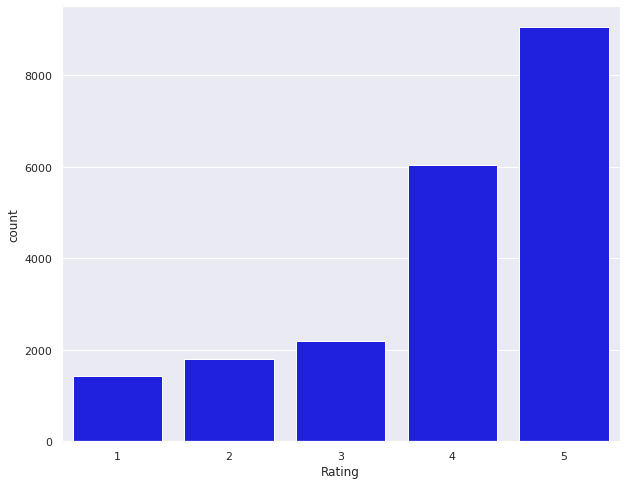

In [5]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(data=df, x='Rating', color='blue')

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
def wordcloud_generator(data, title=None):
  wordcloud = WordCloud(width=800, height=800,
                        min_font_size=10
                        ).generate(" ".join(data.values))
                        
  # plot the WordCloud image
  plt.figure(figsize=(8,8), facecolor=None)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.title(title,fontsize=30)
  plt.show()

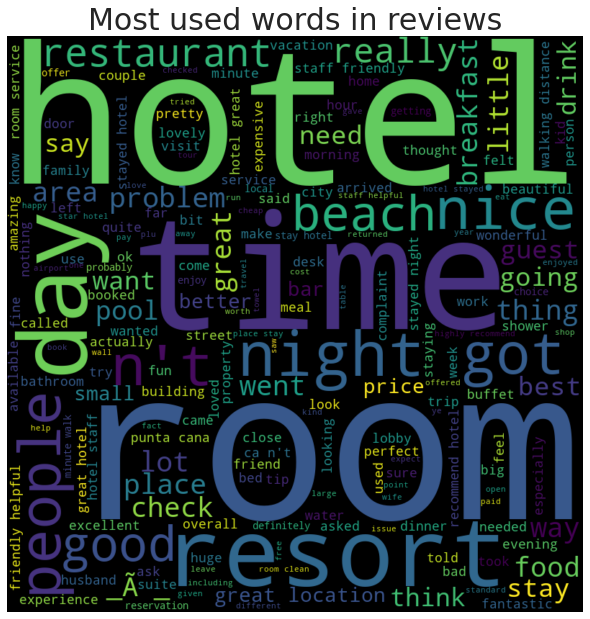

In [8]:
wordcloud_generator(df['Review'], title="Most used words in reviews")

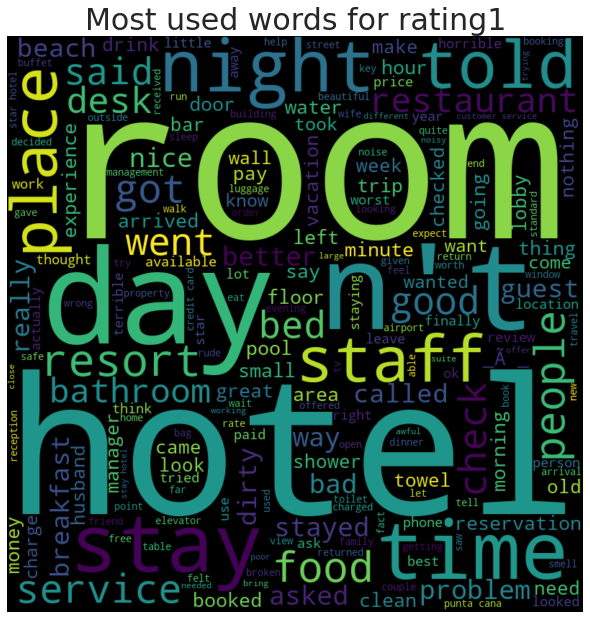

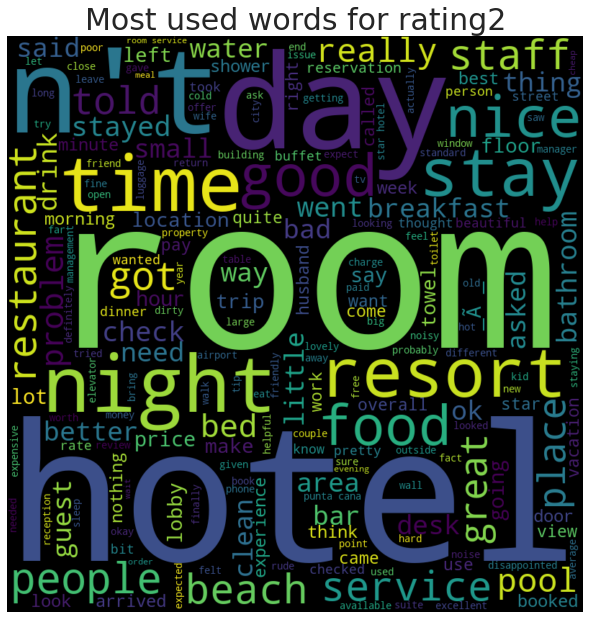

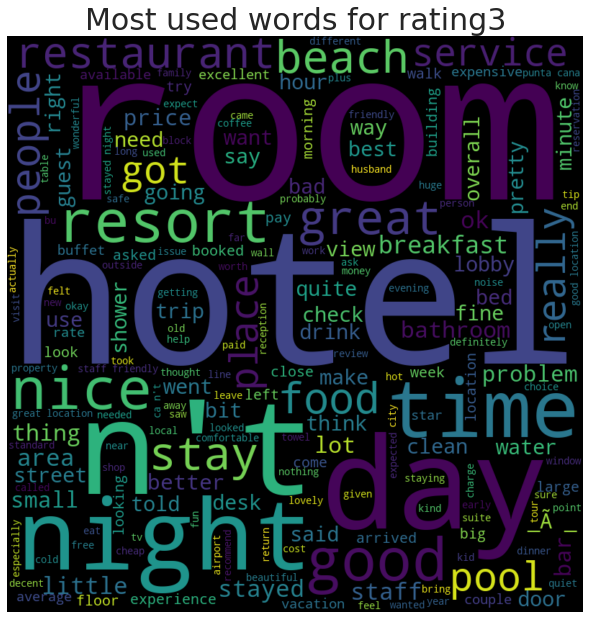

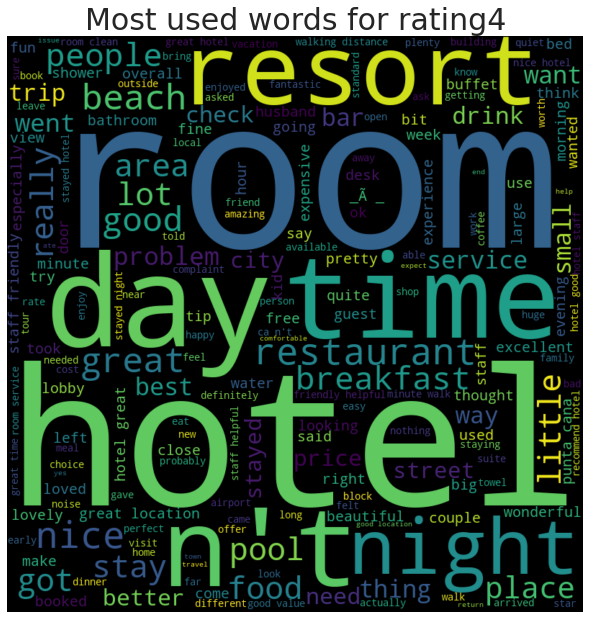

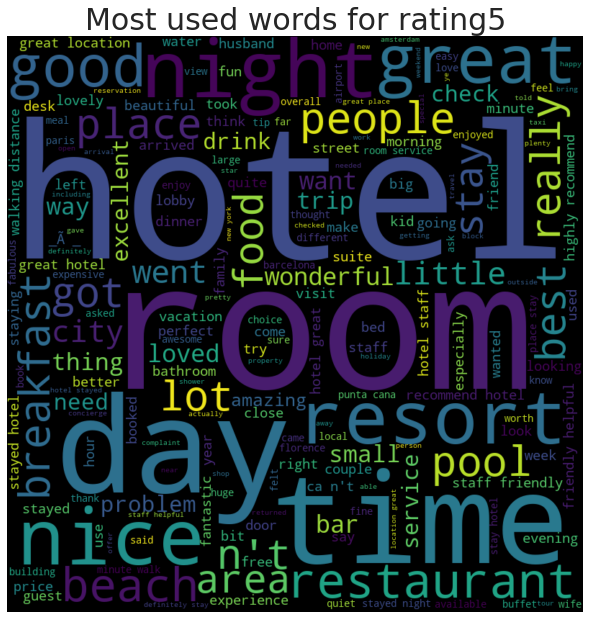

In [9]:
for rating in range(1,6):
  reviews = df[df['Rating']==rating]
  wordcloud_generator(reviews['Review'], title="Most used words for rating" + str(rating))

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
feature = tfidf.fit_transform(df['Review'])

In [11]:
query = "restaurant"
queryTFIDF = tfidf.transform([query])

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

cosims = cosine_similarity(queryTFIDF, feature).flatten()

In [13]:
results = cosims.argsort()[:-6:-1]

In [14]:
for r in results:
  print(df.iloc[r]['Review'])
  print("----")

grand time sunscape punta cana grand, wife just returned beautiful resort 12/1/04, absolutely loved, beach pools staff room activities class, problem involved tex-mex restaurant american grill restaurant, restaurant closed remodeling re-opened days ago, explains worst restaurant experiences endured, told expect 30-40 minute wait turned 1.5 hours, finally got restaurant shocked tables, wait, food took long time arrive forgot baked potato really did n't matter, loved resort come time, hats juan cruz splash bar juan adult pool bar excellent service hospitality, grilled schrimp italian restaurant excuisite, jean,
----
friendly people stayed nights june, stop weeks spain hotel got great start, people working wanting help needed, reception business center housekeeping restaurant efficient easy work, booked executive room upper floors given great room terrific view, worth extra money, ate restaurant floor night food service view quite good, live manhattan service food big deal delivered resta

In [15]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(review)['compound'] for review in df['Review']]
df['Sentiments'] = sentiments
df.head()

,Review,Rating,Sentiments
0,nice hotel expensive parking got good deal sta...,4,0.9747
1,ok nothing special charge diamond member hilto...,2,0.9787
2,nice rooms not 4* experience hotel monaco seat...,3,0.9889
3,"unique, great stay, wonderful time hotel monac...",5,0.9912
4,"great stay great stay, went seahawk game aweso...",5,0.9797


In [17]:
# search for top 20 reviews with rating 5 but negative reviews
pd.set_option('display.max_colwidth', None)
df[(df['Rating']==5) & (df['Sentiments']<0)].sort_values("Sentiments")[0:20]

,Review,Rating,Sentiments
3613,"fabulous, booking vacation 4 dismay realized punta cana not mexico, frantically searched information possibly iberostar punta cana, tripadvisor helpful reading personal reviews experiences nervous wreck, apprehension arrived 12/5/03, arrival airport flights arriving time orderly fashion went quickly, check went wanted king sized beds none available till day, no problem, grounds absolutely beautifull maintained, entire resort practically spotless, people work hard cleaning areas resort, met unfriendly worker, bent backward accomodate reason course, food aplenty satisfy tastebuds, types activity spanish lessons dancing arobics, did nothing relax eat drink dance alittle night, no group got sick brushed teeth spigot water, believe moderation probably key, rooms clean no trouble whatsoever housekeeping, wonder people wrote negative remarks place stayed sameplace did, thing upset trip did not book weeks, heart beat,",5,-0.9677
7143,"wonderful 10 year anniversay went secrets feb. 28- mar, 6 2004. read million reviews quite nervous going having bad experience, not happened, beautiful experience, resort beautiful people friendly accommidating, thing wrong, negative review true slowness service restaurants, did bring bug spray use not night walked beach, complaint resort little pet peeve n't cappucino 10:00, like alot earlier really no big deal, resort heart beat try new place, worrying good place, absolutely, email question,",5,-0.9272
13296,"hell argonaut changed planned birthday getaway city husband, stuck work til late night, packed grabbed sleepy kids drove argonaut, husband not eaten breakfast things not going, cranky kids irrate husband prayed hotel nice, tripadvisor took chance, soon dinner 10pm stood line 2 couples germans needed explained, thought worst going, time turn receptionist bit annoyed ordeal, requested room gave key, turned mentioned husband birthday bad start, suggested room 2 queens not satisfactory best comfortable, went room definitely quiet inner court nothing write home, went downstairs asked choices, suggested ocean view king size bed separate pull sofa children, jacuzzi tub, offered room deep discount took, receptionist n't warm fuzzy type person encountered gets a+ trying knowing condition.it luxurious comforter 2 bedroom suite-pocket doors table minibar huge space thousand square feet overlooking alcatraz ocean leopard robes huge jacuzzi tub family fit, 2 kids, husband able sleep luxurious bath, kids plenty running room.i sad leave know time, request upgrade king suite night, btw park beach parking garage, cheaper,",5,-0.9252
12767,"dumbstruck nothing kudos place check check room staff nothing short excellent, view room overlooking trade center river incredible, weekend kind quiet want, skip restaurant recommendations church day rate..you wo n't dissapointed, traveller spends 80 nights year hotels, place star rating, not solid, loved having starbucksa door complaint lack coffee maker room, thats complaint,",5,-0.9060
3199,"disgusted comments just wanted make comments, notice bad reviews come cities north-east usa, makes sick listen prejudice comments, n't realize iknow n't foreigner going country need learn language, dont criticise country does n't know speak english, wake people different attitude explore different cultures, ca n't stay home visit english speaking country,",5,-0.9021
1317,"oasis preface saying really hate waikiki, crowds, noise, over-commercialization, asked fly speak conference excited visit islands mean c'mon kind dreading waikiki, wow, royal hawaiian saved, older historic section, read reviews people did n't like, granted legitimately bad experience, think likely accustomed box-like rooms standard here.my room quiet, outside garden birds singing, staff not professional courteous, 10. surrounded highrises insanity tourism gone wild place fortress solitude, come, heartbeat, bring family,",5,-0.8292
2025,"katrina life saver did not stay holiday inn hurricane

In [18]:
# rating 1 but good reviews, top 20 records only
df[(df['Rating']==1) & (df['Sentiments']>0)].sort_values("Sentiments",ascending=False)[0:20]

Review  \
17082                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          large personalized service, terrible food terrible service stayed resort christmas holidays december 21 december 28 2007 room 65109. hotel lobby nice clean check went smoothly no hitches, staff polite check, given map, no schedule activities no information booking reservations restaurants, extra things paid package, thank god trip advisor, research.this hotel sections not packages not allowed enjoy amenities, just wander pool area comes tells leave, saw happen guests, instructions check prevent this.ok good things, property property quite nice, landscaping good not breathtaking resort kept clean, big plus given 70 buildings resort 18 rooms, did napkin calculation came 7,000 people resort occupancy christmas period, kept people waiting eat christmas dinner night send folks upgraded premier area just accommodate real nuisance actually paid upgrade.beach beach ocean just beautiful, ocean beautiful nice swim no shells no rocks just beautiful miles white sand, biggest plus vacation, plenty shade beach lounge chair reserve towel 8am morning, real downer vacationers, beach allowed topless lot that.rooms rooms comfortable clean, stayed ambar section upgrade, bed average no westin beds comfortable, air conditioner worked great, bathroom nice clean rain head showers, lighting terrible rooms, say rooms furnishings 3 star level.now areas needing improvement lots food 7,000 people place starts feel like campus instead resort food takes cafeteria quality, food terrible cold, cooks sloppy preparing meals e.g. omelettes, not trust salads lots water pan, food beach better warm, roast chicken burgers fries days, hot items, love pork enjoy dr. lots not bad, wished local food maybe better prepared, cooks not chefs did not clue, food important vacation rule resort, said did sent premier section christmas dinner overflow, food ok guess pay big bucks ok food not great, did visit reserved restaurants just set menu, pre-made just brought fridge table cold plate, none restaurants great french gourmet better tried.service no personalized service, sense employees not happy treated comes service, no really stretches provide good service, polite not necessarily pleasant, examples family friends tried transferred 5-15 minutes connecting room, sleeping night heard sounded like running water, ceiling leaking floor, called desk transferred 4am person spoke said not job__Ã‡, no came check leak, employees easily tell not job point says, sense employees not really empowered, black family traveling received discriminatory service staff e.g. skipping line taking white folks having waiters come serve table, experienced different points stay, apparently history dark skinned black people dr. 20 black people resort 7000 people strange, did not let spoil holiday not there.getting resort shuttle n't want walk 5-10 minute walk resort especially beach main dining areas, great thing hang getting resort does not huge anymore.nightly shows entertainment staged shows resorts average, tried french cabaret western shows e.g. lion king- course oddly interpreted, like making dinner bunch chefs guests europeans americans, mini-circus night good, better showing latin culture rich vibrant fun, nightly live band does mix imitating western ballads poorly singers reading words performing set staff organize daytime events volleyball dance sing live band dance guests nightclub, somet